## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2


Assignment 2 is worth 15% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


### Question 1
Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

The following questions will be answered for wine_data_all.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

In [2]:
red_wine_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                          sep=';')
white_wine_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                            sep=';')

In [3]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
wine_data_all = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [6]:
wine_data_all.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


### Question 2
Check the data types of the attributes. (2 points)

In [7]:
wine_data_all.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
wine_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [9]:
wine_data_all.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [10]:
# Select only the columns that are not 'quality'
attributes_other_than_quality = wine_data_all.drop('quality', axis=1)

In [11]:
# Calculate the correlation
correlation_matrix = attributes_other_than_quality.corr()

In [12]:
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidit

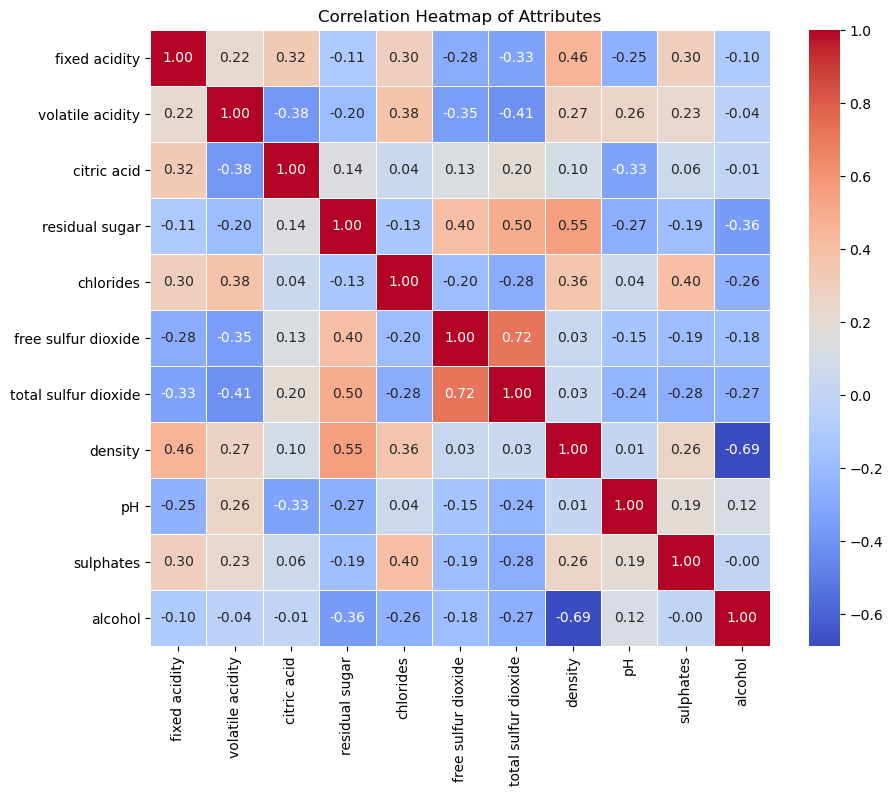

In [13]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Attributes')
plt.show()

### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

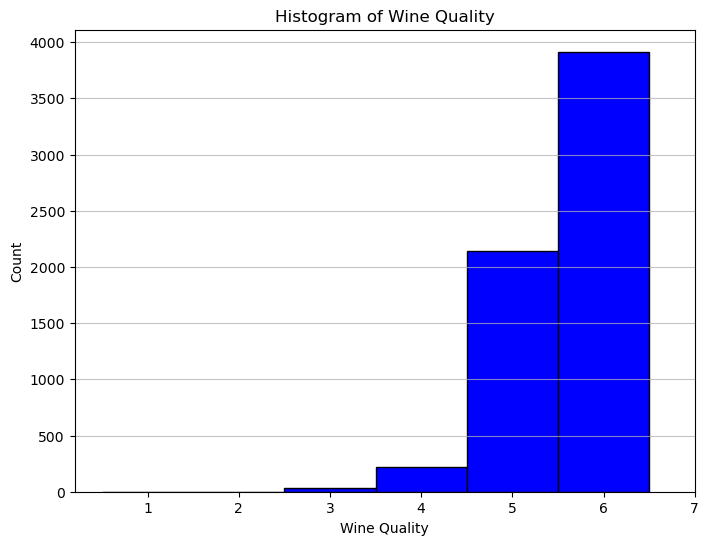

In [14]:
# Plot the histogram of wine quality
plt.figure(figsize=(8, 6))
plt.hist(wine_data_all['quality'], bins=range(1, 8), edgecolor='black', align='left', color='blue')
plt.title('Histogram of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.xticks(range(1, 8))
plt.grid(axis='y', alpha=0.75)
plt.show()

### Question 6
Reduce the levels of rating for quality to three levels, i.e., high(2), medium(1), and low(0). Assign the levels 3 and 4 to level 0; 5 and 6 to level 1; and 7, 8, and 9 to level 2. You can use either “high, medium, low” or equivalent numbers. (10 points)

In [15]:
# Map the quality levels to the new reduced levels
quality_mapping = {0: [3, 4], 1: [5, 6], 2: [7, 8, 9]}
wine_data_all['quality'] = wine_data_all['quality'].apply(
                                        lambda x: next((k for k, v in quality_mapping.items() if x in v), None))

In [16]:
wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
numeric_attributes = wine_data_all.drop(['quality'], axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric attributes using MinMaxScaler
normalized_data = scaler.fit_transform(numeric_attributes)

# Create a DataFrame with normalized values
normalized_df = pd.DataFrame(normalized_data, columns=numeric_attributes.columns)

normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


### Question 8
Divide the dataset to training and test sets. (10 points)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Separate features X and target variable y
X = wine_data_all.drop('quality', axis=1)
y = wine_data_all['quality']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)


### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000, solver='sag')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:", conf_matrix)
print("\nClassfication Report:", class_report)

Accuracy: 0.7823076923076923

Confusion Matrix: [[  0  49   0]
 [  0 966  33]
 [  0 201  51]]

Classfication Report:               precision    recall  f1-score   support

           0       1.00      0.00      0.00        49
           1       0.79      0.97      0.87       999
           2       0.61      0.20      0.30       252

    accuracy                           0.78      1300
   macro avg       0.80      0.39      0.39      1300
weighted avg       0.77      0.78      0.73      1300



### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Initialize the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn )

# Display the results
print("Accuracy:", accuracy_knn)
print("\nConfusion Matrix:", conf_matrix_knn)
print("\nClassfication Report:", class_report_knn)

Accuracy: 0.7530769230769231

Confusion Matrix: [[  3  44   2]
 [ 11 902  86]
 [  1 177  74]]

Classfication Report:               precision    recall  f1-score   support

           0       0.20      0.06      0.09        49
           1       0.80      0.90      0.85       999
           2       0.46      0.29      0.36       252

    accuracy                           0.75      1300
   macro avg       0.49      0.42      0.43      1300
weighted avg       0.71      0.75      0.73      1300



### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
# confusion matrix using Logistic Regression model
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix using KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix)

print("\nConfusion Matrix for KNN:")
print(conf_matrix_knn)

Confusion Matrix for Logistic Regression:
[[  0  49   0]
 [  0 966  33]
 [  0 201  51]]

Confusion Matrix for KNN:
[[  3  44   2]
 [ 11 902  86]
 [  1 177  74]]


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred, average='weighted',
                                   zero_division=1)
logreg_recall = recall_score(y_test, y_pred, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}\n")

# KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')

print("KNN Performance:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")

Logistic Regression Performance:
Accuracy: 0.7823
Precision: 0.7659
Recall: 0.7823

KNN Performance:
Accuracy: 0.7531
Precision: 0.7133
Recall: 0.7531


- Accuracy:
Accuracy tells us how many predictions a model got right. For Logistic Regression, it's about 78.23%, and for KNN, it's about 75.31%. So, Logistic Regression is a bit more accurate.

- Precision:
Precision is about the accuracy of positive predictions. For Logistic Regression, when it says something is positive, it's right about 76.59% of the time. KNN is a bit lower, around 71.33%. Higher precision is better, meaning the model is more careful about saying things are positive.

- Recall:
Recall is how well a model finds all the actual positive cases. For Logistic Regression, it captures about 78.23% of all actual positives, and for KNN, it's about 75.31%. Higher recall is better, especially in situations where missing positive cases is a big concern, like in medical diagnoses.

- Conclusion:
Overall, Logistic Regression performs better in terms of accuracy, precision, and recall compared to KNN. So, for this dataset, Logistic Regression seems to be the better choice.

This is the end of Assignment 2

Ceni Babaoglu, PhD